In [8]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import random

In [9]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [10]:
import scipy.misc

(100, 212)
117
int64


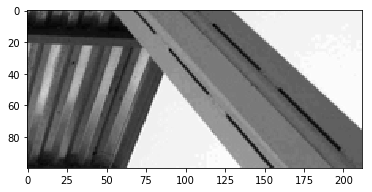

In [11]:
ascent = scipy.misc.ascent()
plt.gray()
plt.imshow(ascent, interpolation='nearest')
cropped_ascent = ascent[:100, 300:]
plt.imshow(cropped_ascent, interpolation='nearest')
print(cropped_ascent.shape)
print(cropped_ascent[90,90])
print(cropped_ascent.dtype)

torch.Size([100, 212])
117.0

 117
[torch.DoubleTensor of size 1]

torch.Size([1, 100, 212])

 117
 117
 117
[torch.FloatTensor of size 3]

torch.Size([3, 100, 212])


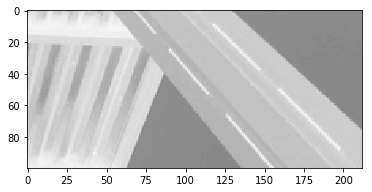

In [12]:
img = torch.from_numpy(cropped_ascent.astype(float))
print(img.size())
print(img[90,90])
img = img.clone().view(1,100,212)
print(img[:,90,90])
print(img.size())
img = torch.cat((img, img, img), 0).float()
show(img)
print(img[:,90,90])
img.div_(255);
print(img.size())

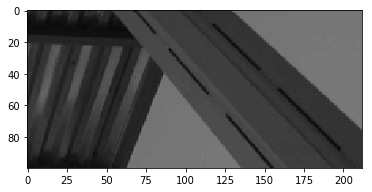

In [13]:
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(img))

torch.Size([3, 256, 542])


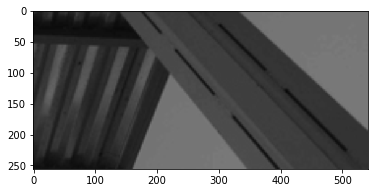

In [14]:
img2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Scale(256),
    transforms.ToTensor(),
])(img)
print(img2.size())
show(img2)

In [15]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
cifar = dset.CIFAR10(root="abc/def/ghi", download=True)

svhn = dset.SVHN(root="SVHN", download=True)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
trans = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [17]:
import torchvision.utils as tutils

(0.3447227418679783, 0.2394201584629635, 0.0, 1.0)
(0.39886770722660003, 0.29678905852812765, 0.0, 0.9960784316062927)
(0.468646604664779, 0.3677477377116483, 0.0, 1.0)
(0.2723843512588549, 0.18316628776684016, 0.0, 0.9176470637321472)
(0.366338601233565, 0.2638492799925826, 0.0, 0.9960784316062927)
(0.3070670007042888, 0.25710352488461347, 0.0, 0.9882352948188782)
(0.42950241056738986, 0.24433312784127967, 0.0, 0.9764705896377563)
(0.4606604996988608, 0.24625605326498518, 0.0, 0.9725490212440491)
(0.5127119180991334, 0.29667993582637153, 0.0, 0.9882352948188782)
(0.21747090033386485, 0.22067221914967716, 0.0, 0.8549019694328308)
(0.2501876602182165, 0.11604616269949485, 0.0, 0.5098039507865906)
(0.5163271142901067, 0.2919319492890118, 0.0, 0.9960784316062927)
(0.4420253860040854, 0.3213183102507684, 0.0, 0.9725490212440491)
(0.2876812762663879, 0.3052423417442988, 0.0, 0.95686274766922)
(0.3183989568310608, 0.211348745630777, 0.0, 1.0)
(0.46072177440631396, 0.2682094180101358, 0.0, 0.

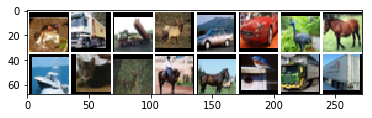

In [18]:
transformed_images = []
for i in range(20):
    transformed_images += [trans(cifar[i][0])]
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))

(0.19860345745595018, 0.12752193726425876, 0.0, 0.42352941632270813)
(0.2439823388849618, 0.12449551610539368, 0.0, 0.43921568989753723)
(0.6650773673645745, 0.32006312673103055, 0.0, 1.0)
(0.6452754880920111, 0.34244550561336656, 0.0, 1.0)
(0.4585120666500491, 0.18416390901217158, 0.0, 0.6705882549285889)
(0.40096253328374587, 0.21387225474054342, 0.0, 0.658823549747467)
(0.33784978536035243, 0.18588997441968147, 0.0, 0.7098039388656616)
(0.383518444383905, 0.14334319244836213, 0.0, 0.7019608020782471)
(0.26681858212153503, 0.15564934646994724, 0.0, 0.5568627715110779)
(0.26279361302901333, 0.14969924770894574, 0.0, 0.5529412031173706)
(0.29382915277771343, 0.13040630888615865, 0.0, 0.48235294222831726)
(0.28291590664351435, 0.14252633100462037, 0.0, 0.4745098054409027)
(0.3725630725117905, 0.18611437193120156, 0.0, 0.7686274647712708)
(0.38754596699921723, 0.23087779838291803, 0.0, 0.7176470756530762)
(0.5607958197263846, 0.24392419575534247, 0.0, 0.8196078538894653)
(0.6132250997082

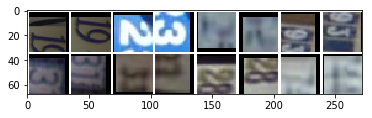

In [19]:
transformed_images1 = []
for i in range(20):
    transformed_images1 += [trans(svhn[i][0])]
    print(transformed_images1[i].mean(),transformed_images1[i].std(), 
          transformed_images1[i].min(), transformed_images1[i].max())
show(tutils.make_grid(transformed_images1))

(-0.3257020916595745, 0.49030737107138356, -1.0, 1.0)
(-0.1148718173111168, 0.5943530690757043, -1.0, 0.9921568632125854)
(-0.1876123301917687, 0.6578509306606333, -1.0, 1.0)
(-0.45916819203800213, 0.36674404239797703, -1.0, 0.8352941274642944)
(-0.3001455154347544, 0.5464976989913715, -1.0, 0.9921568632125854)
(-0.3879825306551841, 0.5142138738794487, -1.0, 0.9450980424880981)
(-0.16791767110892883, 0.4776867721654128, -1.0, 0.9529411792755127)
(-0.07867900658554088, 0.49251211342491164, -1.0, 0.9450980424880981)
(-0.012275311339180917, 0.6259931231081871, -1.0, 0.9764705896377563)
(-0.47579912012831, 0.44796901896179764, -1.0, 0.7098039388656616)
(-0.4709048134003145, 0.22142046144980368, -1.0, 0.019607901573181152)
(-0.07774712605169043, 0.6400356728895145, -1.0, 0.9921568632125854)
(-0.06678664839516084, 0.6134990363534119, -1.0, 0.9686274528503418)
(-0.5750025513892373, 0.5272717873515015, -1.0, 0.8745098114013672)
(-0.410664308796792, 0.43596309108907383, -1.0, 1.0)
(-0.068285313

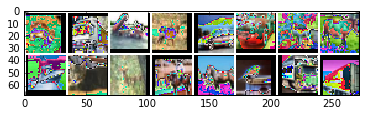

In [16]:
for i in range(20):
    transformed_images[i] = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_images[i])
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))

(-0.6027930944886369, 0.25504387635803144, -1.0, -0.15294116735458374)
(-0.5120353306992911, 0.24899103609472537, -1.0, -0.12156862020492554)
(0.3301547337905504, 0.6401262548586821, -1.0, 1.0)
(0.290550974488724, 0.6848910133664217, -1.0, 1.0)
(-0.08297586669990172, 0.36832781802434317, -1.0, 0.34117650985717773)
(-0.19807493343250826, 0.42774450948108683, -1.0, 0.3176470994949341)
(-0.32430043232549605, 0.3717799509297473, -1.0, 0.41960787773132324)
(-0.23296311534553146, 0.2866863899280852, -1.0, 0.40392160415649414)
(-0.46636284158254665, 0.31129869588939, -1.0, 0.11372554302215576)
(-0.4744127803908971, 0.29939849907478133, -1.0, 0.10588240623474121)
(-0.4123416987325375, 0.2608126205594464, -1.0, -0.03529411554336548)
(-0.4341681916460705, 0.285052664648147, -1.0, -0.05098038911819458)
(-0.25487385868715745, 0.37222874887821283, -1.0, 0.5372549295425415)
(-0.2249080662537987, 0.4617555969442557, -1.0, 0.43529415130615234)
(0.12159163945276912, 0.48784839151068493, -1.0, 0.6392157

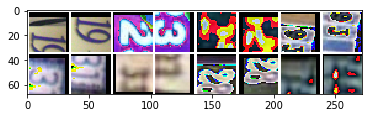

In [20]:
for i in range(20):
    transformed_images1[i] = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_images1[i])
    print(transformed_images1[i].mean(),transformed_images1[i].std(), 
          transformed_images1[i].min(), transformed_images1[i].max())
show(tutils.make_grid(transformed_images1))